### Importing all the libraries

In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

Columns:
1. Age - Age of the primary beneficiary
2. Sex - Gender of the insurance contractor
3. BMI - Body mass index
4. Children - Number of children covered by health insurance per number of dependents
5. Smoker - Smoking Boolean True/False
6. Region - Northeast, southeast, southwest, northwest
7. Charges - Medical Cost/Charges

In [67]:
#import dataset 
df = pd.read_csv('insurance.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
df.describe().T

count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801

## Exploratory Data Analysis

In [70]:
## Check for na values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no na values.

In [71]:
## check for duplicated values
df.duplicated().sum()

1

There are duplicate rows, hence it is important to remove the duplicated rows

In [72]:
df[df.duplicated(keep=False)] ## selecting rows with duplicated entries

age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631

In [73]:
df = df.drop_duplicates()
df.duplicated().sum() ## succesfully removed the duplicated entries

0

Text(0.5, 1.0, 'Distribution of Charges')

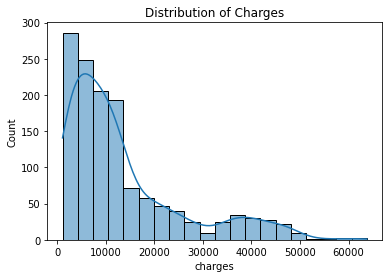

In [74]:
sns.histplot(data=df, x='charges', bins=20,kde=True)
plt.title('Distribution of Charges')

In [75]:
## Each column distribution 

<AxesSubplot:xlabel='sex', ylabel='count'>

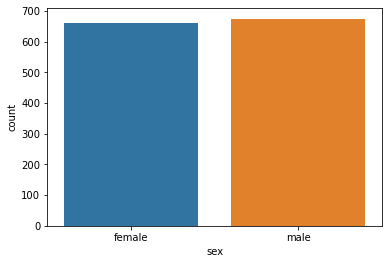

In [76]:
sns.countplot(data=df,x='sex')

<AxesSubplot:xlabel='children', ylabel='count'>

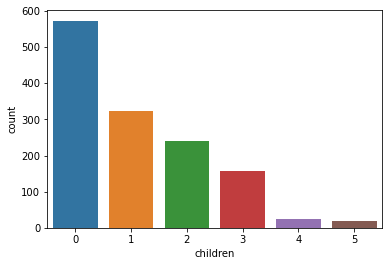

In [77]:
sns.countplot(data=df,x='children')

<AxesSubplot:xlabel='smoker', ylabel='count'>

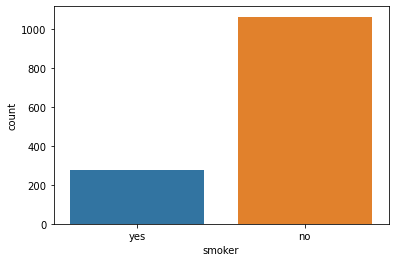

In [78]:
sns.countplot(data=df,x='smoker')

<AxesSubplot:xlabel='region', ylabel='count'>

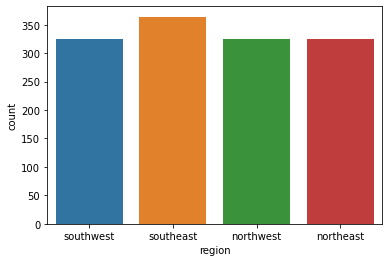

In [79]:
sns.countplot(data=df,x='region')

<AxesSubplot:xlabel='charges', ylabel='Count'>

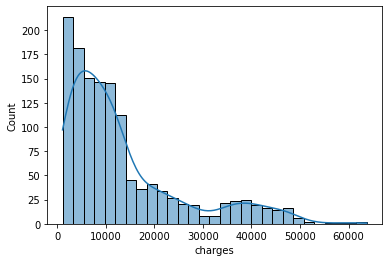

In [80]:
sns.histplot(data=df,x='charges',kde=True)

<AxesSubplot:xlabel='charges'>

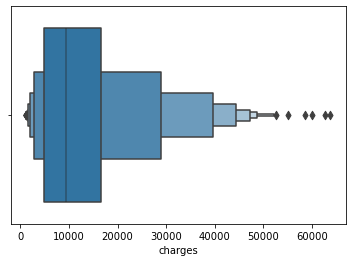

In [81]:
sns.boxenplot(data=df, x='charges')

<AxesSubplot:xlabel='charges', ylabel='Count'>

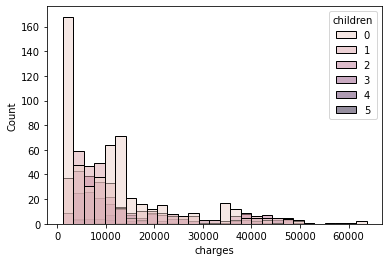

In [82]:
sns.histplot(data=df, x='charges', hue='children')

<AxesSubplot:xlabel='charges', ylabel='children'>

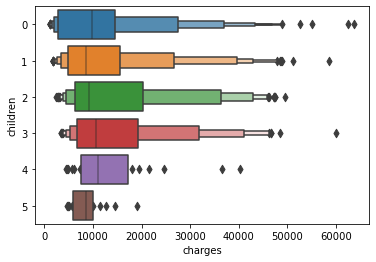

In [83]:
sns.boxenplot(data=df, x='charges',y='children',orient='h')

<AxesSubplot:xlabel='charges', ylabel='Count'>

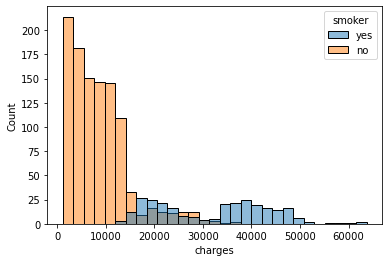

In [84]:
sns.histplot(data=df, x='charges', hue='smoker')

<AxesSubplot:xlabel='charges', ylabel='smoker'>

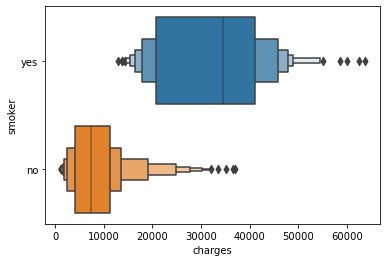

In [85]:
sns.boxenplot(data=df, x='charges',y='smoker',orient='h')

<AxesSubplot:xlabel='charges', ylabel='Count'>

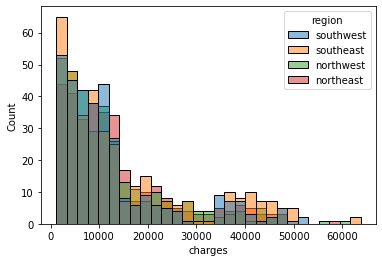

In [86]:
sns.histplot(data=df, x='charges', hue='region')

<AxesSubplot:xlabel='charges', ylabel='region'>

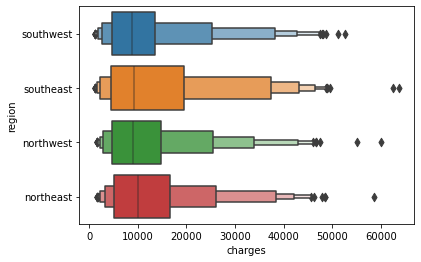

In [87]:
sns.boxenplot(data=df, x='charges',y='region',orient='h')

<AxesSubplot:xlabel='charges', ylabel='Count'>

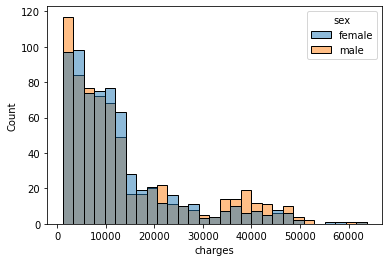

In [88]:
sns.histplot(data=df, x='charges', hue='sex')

<AxesSubplot:xlabel='charges', ylabel='sex'>

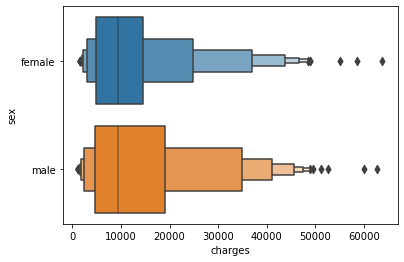

In [89]:
sns.boxenplot(data=df, x='charges',y='sex',orient='h')

In [90]:
### CHARGES VS SMOKERS

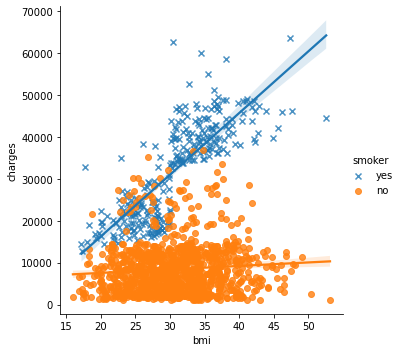

In [91]:
sns.lmplot(data=df,x='bmi',y='charges',hue='smoker',markers=['x','o'])

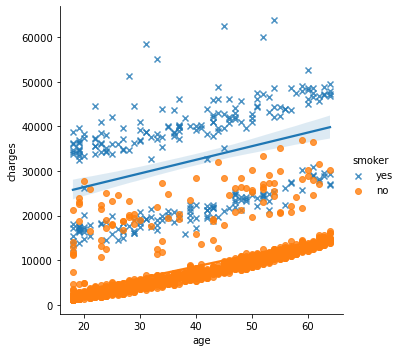

In [92]:
sns.lmplot(data=df,x='age',y='charges',hue='smoker',markers=['x','o'])

In [93]:
## Data Engineering

df_dummies = df.copy()

for i in df_dummies.columns:
    if df_dummies[i].dtype=='object':
        dummies = pd.get_dummies(df_dummies[i], prefix=f'{i}_')
        df_dummies = pd.concat([df_dummies, dummies], axis=1)
        df_dummies = df_dummies.drop(i,axis=1)

In [94]:
df_dummies.head()

age     bmi  children      charges  sex__female  sex__male  smoker__no  \
0   19  27.900         0  16884.92400            1          0           0   
1   18  33.770         1   1725.55230            0          1           1   
2   28  33.000         3   4449.46200            0          1           1   
3   33  22.705         0  21984.47061            0          1           1   
4   32  28.880         0   3866.85520            0          1           1   

   smoker__yes  region__northeast  region__northwest  region__southeast  \
0            1                  0                  0                  0   
1            0                  0                  0                  1   
2            0                  0                  0                  1   
3            0                  0                  1                  0   
4            0                  0                  1                  0   

   region__southwest  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0

In [95]:
## Changing the columns having multiple classes to binary 0 or 1
## Added the name of each category after column name 
## Similar to One hot encoding;

## Show Correlation for all features

<AxesSubplot:>

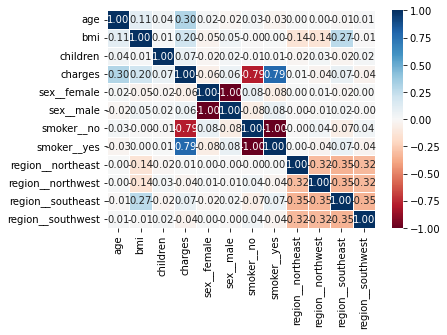

In [96]:
#figsize() -> increase the figure size 
sns.heatmap(df_dummies.corr(), fmt='0.2f', annot=True,cmap='RdBu',linewidths=1,
           )
# mask = np.triu(df_dummies.corr()) ->to mask everything above diagonal 

### Data Preperation


In [97]:
features = df_dummies.drop('charges', axis=1)
target = df_dummies[['charges']]

In [98]:
features

age     bmi  children  sex__female  sex__male  smoker__no  smoker__yes  \
0      19  27.900         0            1          0           0            1   
1      18  33.770         1            0          1           1            0   
2      28  33.000         3            0          1           1            0   
3      33  22.705         0            0          1           1            0   
4      32  28.880         0            0          1           1            0   
...   ...     ...       ...          ...        ...         ...          ...   
1333   50  30.970         3            0          1           1            0   
1334   18  31.920         0            1          0           1            0   
1335   18  36.850         0            1          0           1            0   
1336   21  25.800         0            1          0           1            0   
1337   61  29.070         0            1          0           0            1   

      region__northeast  region__northwest  region__southeast  \
0                     0                  0                  0   
1                     0                  0                  1   
2                     0                  0                  1   
3                     0                  1                  0   
4                     0                  1                  0   
...                 ...                ...                ...   
1333                  0                  1                  0   
1334                  1                  0                  0   
1335                  0                  0                  1   
1336                  0                  0                  0   
1337                  0                  1                  0   

      region__southwest  
0                     1  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
1333                  0  
1334                  0  
1335                  0  
1336                  1  
1337                  0  

[1337 rows x 11 columns]

In [99]:
target

charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1337 rows x 1 columns]

In [100]:
## Train and Test Split

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target,test_size=0.15, shuffle=True)

In [102]:
print('Train Size:', X_train.shape)
print('Test Size:', X_test.shape)

Train Size: (1136, 11)
Test Size: (201, 11)


In [103]:
## 
lis_result = []

def model_prediction(model):
    fig,ax = plt.subplots(nrows=1, ncols=2,
                         figsize=(15,5), sharex=True,sharey=True)
    ax = ax.ravel()
    scores = []
    
    for index,degree in enumerate([1,2]):
        
        pipeline = Pipeline([
            ('degree', PolynomialFeatures(degree=degree)),
            ('scaled', MinMaxScaler()),
            ('model',model)
        ])
        
        pipeline.fit(X_train, Y_train)
        prediction = pipeline.predict(X_test)
        
        r2 = r2_score(prediction,Y_test).round(4)
        mae = mean_absolute_error(prediction, Y_test).round(2)
        rmse = np.sqrt(mean_squared_error(prediction,Y_test)).round(2)
        
        model_name = str(model).split('(')[0]
        
        scores.append([r2,mae,rmse])
        lis_result.append([f'{model_name}, Degree={degree}', r2,mae,rmse])
        
        ax[index].scatter(prediction, Y_test, color='darkcyan', alpha=0.4)
        
        ax[index].plot(np.arange(max(Y_test.values)),np.arange(max(Y_test.values)),
                       '-',color='r')
        ax[index].set_xlabel('Prediction')
        ax[index].set_ylabel('Real')
        ax[index].set_title(f'{model_name} with {degree} Degree')
        ax[index].legend([f'R2: {r2} \nMAE: {mae} \nRMSE: {rmse}'], loc='upper left')
        
    return pipeline

In [104]:
## https://www.kaggle.com/code/beachratchata/medical-cost-prediction-polynomial-regressions

In [121]:
import pickle

In [105]:
##Running for different models

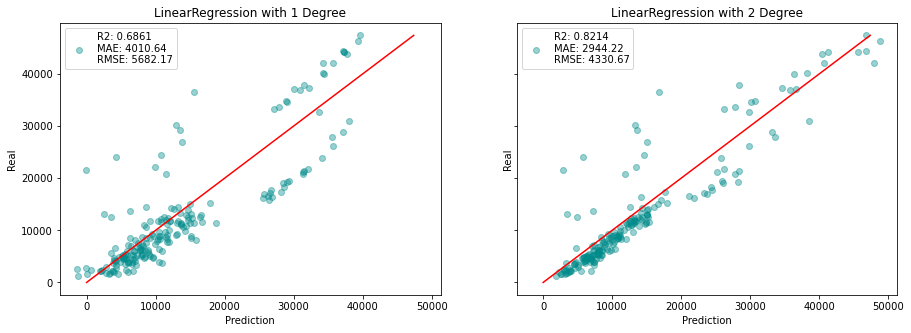

In [106]:
lin_reg = model_prediction(LinearRegression())
# lin_reg

In [107]:
lin_reg

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model', LinearRegression())])

In [120]:
# lin_reg.predict(X_test)

In [122]:
pickled_lin_reg = pickle.dump(lin_reg,open('Lin_Reg_model.pkl','wb'))

In [123]:
#Loading saved Model
pickled_lin_reg_model = pickle.load(open('Lin_Reg_model.pkl','rb'))
pickled_lin_reg_model

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model', LinearRegression())])

In [127]:
y_pred_pkl_lr = pickled_lin_reg_model.predict(X_test)
mae = mean_absolute_error(y_pred_pkl_lr,Y_test).round(2)
mae

2944.22

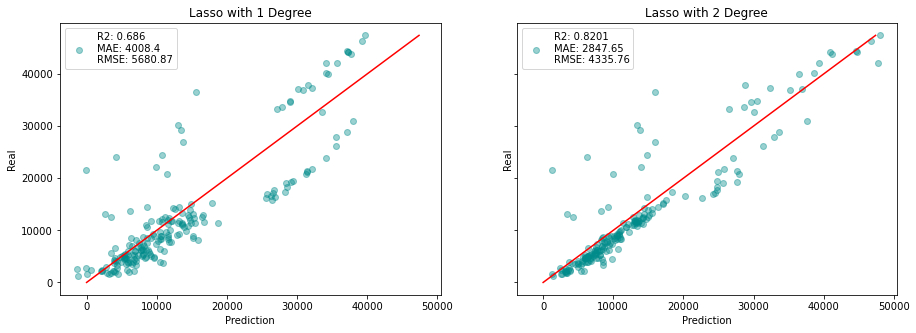

In [110]:
lasso_model = model_prediction(Lasso())

In [111]:
lasso_model

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model', Lasso())])

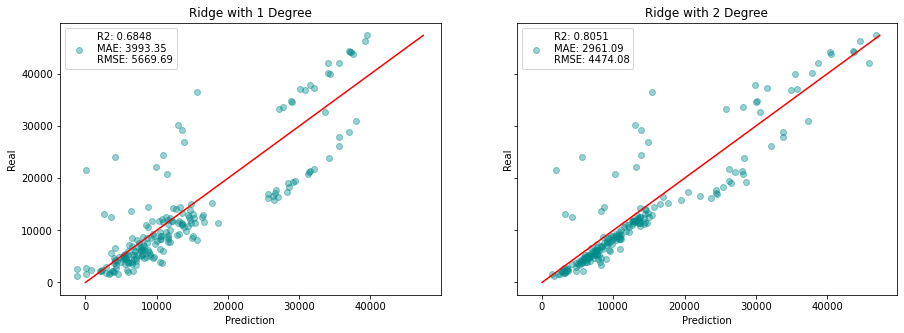

In [113]:
ridge_model = model_prediction(Ridge())

In [114]:
ridge_model

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model', Ridge())])

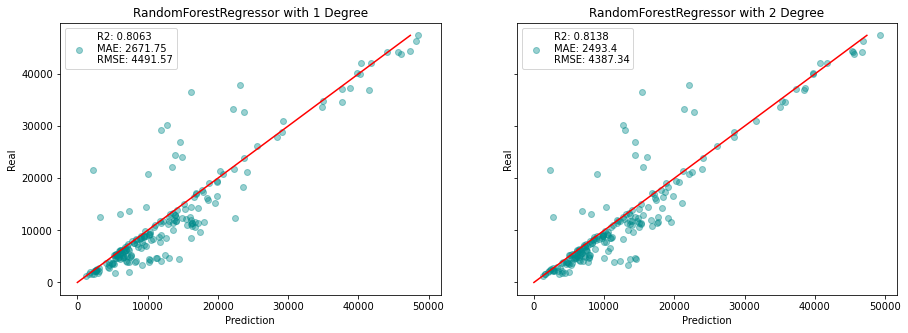

In [115]:
rf_reg = model_prediction(RandomForestRegressor())

In [116]:
rf_reg

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model', RandomForestRegressor())])

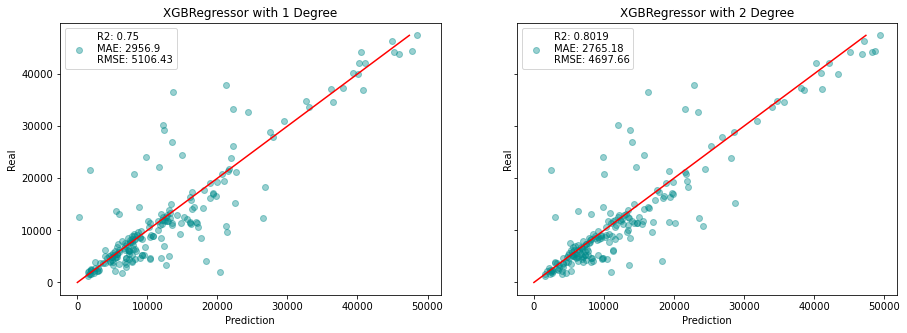

In [117]:
xgb_reg = model_prediction(XGBRegressor())

In [118]:
xgb_reg

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

In [94]:
lis_result[7]

['RandomForestRegressor, Degree=2', 0.7861, 2722.01, 4863.39]

In [91]:
df_result = pd.DataFrame(lis_result, columns=['Model','R2','MAE','RMSE']).sort_values(
['MAE','RMSE'],ignore_index=True).set_index('Model')

In [96]:
df_result

R2      MAE     RMSE
Model                                                    
RandomForestRegressor, Degree=2  0.7861  2722.01  4863.39
RandomForestRegressor, Degree=1  0.7723  2818.11  4919.57
XGBRegressor, Degree=1           0.7661  2846.81  5051.68
XGBRegressor, Degree=2           0.7731  2850.01  5100.36
LinearRegression, Degree=2       0.7805  2882.30  4847.45
Lasso, Degree=2                  0.7803  2882.78  4764.53
Ridge, Degree=2                  0.7659  2998.66  4869.20
Ridge, Degree=1                  0.6151  4310.50  6159.77
Lasso, Degree=1                  0.6174  4325.57  6164.09
LinearRegression, Degree=1       0.6178  4326.52  6163.66

In [97]:
df_result.sort_values(by='R2',ascending=False)

R2      MAE     RMSE
Model                                                    
RandomForestRegressor, Degree=2  0.7861  2722.01  4863.39
LinearRegression, Degree=2       0.7805  2882.30  4847.45
Lasso, Degree=2                  0.7803  2882.78  4764.53
XGBRegressor, Degree=2           0.7731  2850.01  5100.36
RandomForestRegressor, Degree=1  0.7723  2818.11  4919.57
XGBRegressor, Degree=1           0.7661  2846.81  5051.68
Ridge, Degree=2                  0.7659  2998.66  4869.20
LinearRegression, Degree=1       0.6178  4326.52  6163.66
Lasso, Degree=1                  0.6174  4325.57  6164.09
Ridge, Degree=1                  0.6151  4310.50  6159.77

In [98]:
## Saving the Models in Pickle Models 